# hi 

In [1]:
# Import numpy and pandas package 

import pandas as pd
import numpy as np 

# Data visualization

from matplotlib import pyplot as plot
import statsmodels.api as sm
import seaborn as sns  
#from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv(r'Housing.csv')

In [3]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [5]:
data.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.shape

(545, 13)

In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas

In [9]:
data.shape

(545, 13)

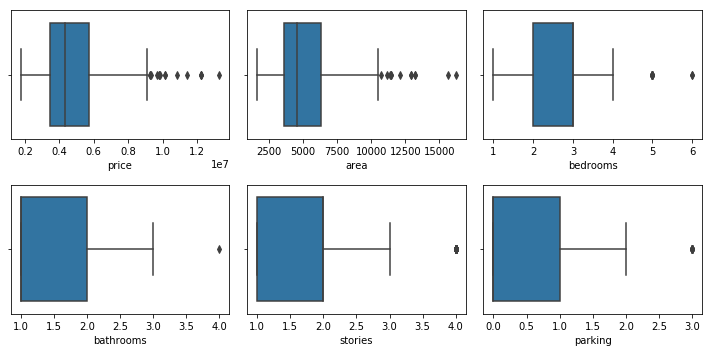

In [10]:
def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(data['price'], ax = axs[0,0])
    plt2 = sns.boxplot(data['area'], ax = axs[0,1])
    plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
    plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
    plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
    plt3 = sns.boxplot(data['parking'], ax = axs[1,2])
    plot.tight_layout()
detectOutliers()

In [11]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

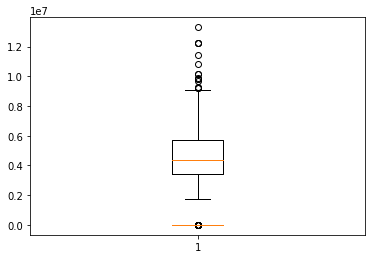

In [12]:
# Outlier reduction for price
plot.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

# Outlier reduction for area
plot.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]



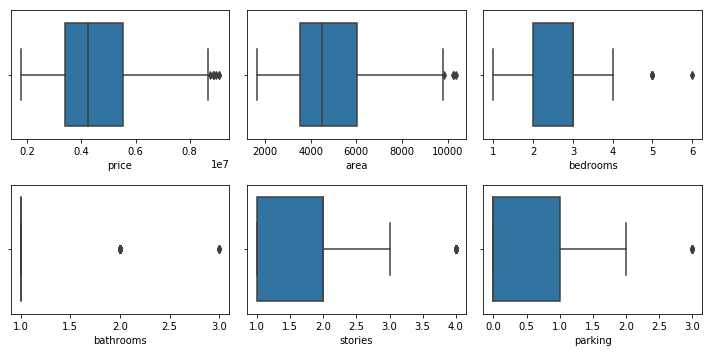

In [13]:
detectOutliers()

In [14]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
data.shape

(517, 13)

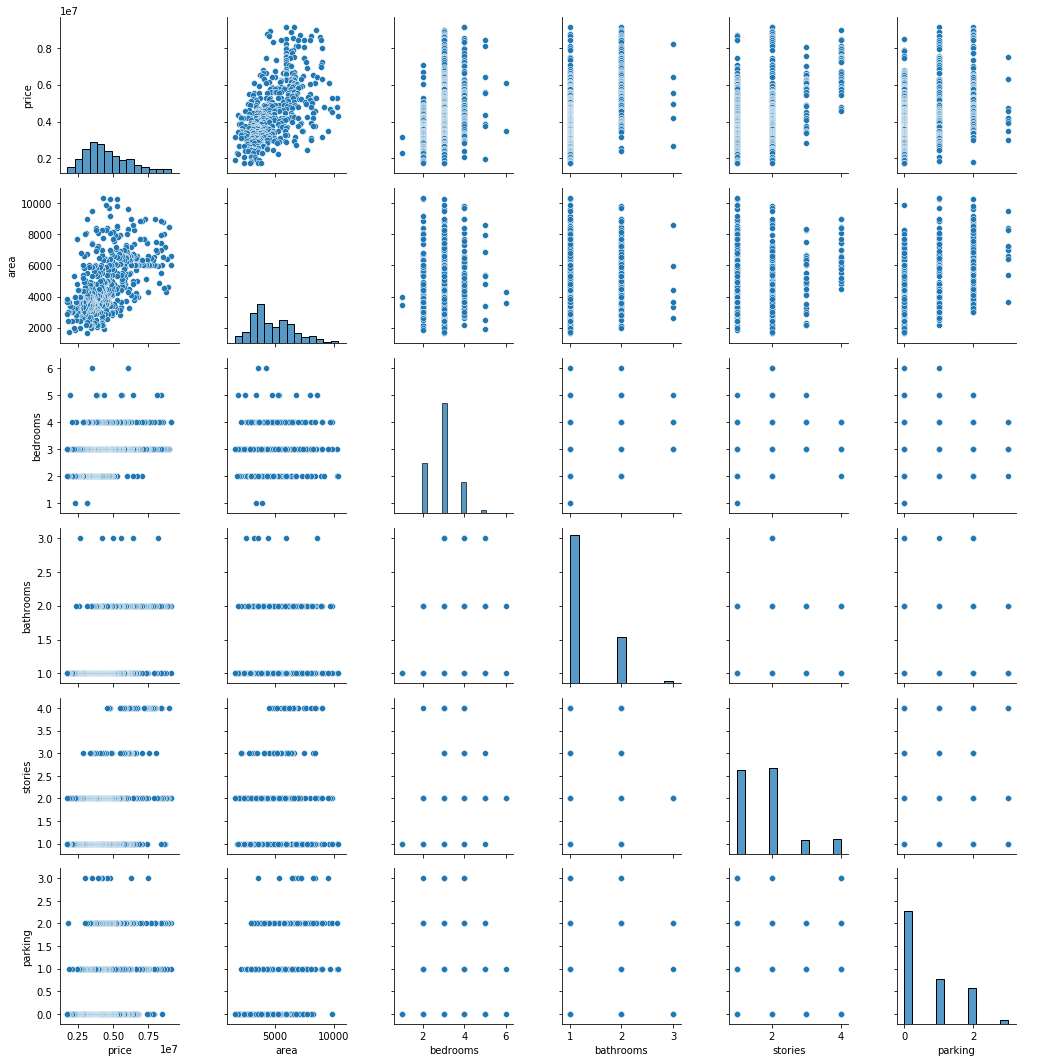

In [16]:
sns.pairplot(data)
plot.show()

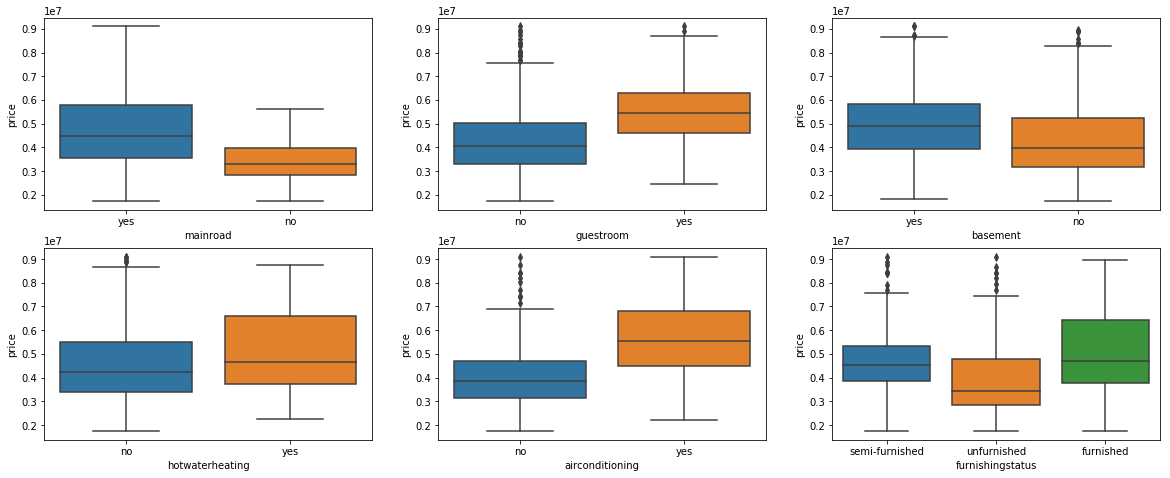

In [17]:
plot.figure(figsize=(20, 12))
plot.subplot(3,3,1)
sns.boxplot(x='mainroad', y='price', data=data)
plot.subplot(3,3,2)
sns.boxplot(x='guestroom', y='price', data=data)
plot.subplot(3,3,3)
sns.boxplot(x='basement', y='price', data=data)
plot.subplot(3,3,4)
sns.boxplot(x='hotwaterheating', y='price', data=data)
plot.subplot(3,3,5)
sns.boxplot(x='airconditioning', y='price', data=data)
plot.subplot(3,3,6)
sns.boxplot(x='furnishingstatus', y='price', data=data)
plot.show()

In [18]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [19]:

cat_columns = ['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
        'prefarea']

def binary_mapping(x):
    return x.map({'yes': 1, "no": 0})

data[cat_columns] = data[cat_columns].apply(binary_mapping)

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [ ]:
data.isnull().sum()

In [ ]:
#ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')
#ohe_df = pd.DataFrame(ohe.fit_transform(data[['furnishingstatus']]))

In [ ]:
#ohe_df.columns = ohe.get_feature_names(['status'])

#ohe_df.head()

In [20]:
table = pd.get_dummies(data['furnishingstatus'])   #add the column into table variable
table.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [21]:
table = pd.get_dummies(data['furnishingstatus'], drop_first = True)  #recreate table but now drop the first column(furnished)
table.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [22]:
data = pd.concat([data, table], axis = 1)  #attach the other two columns to our data set
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [23]:
data.drop(['furnishingstatus'], axis = 1, inplace = True) #drop the old column from the dataset #dummy variable trap
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [24]:
Y = data.price# includes the fields other than prices
X = data.iloc[:,1:]

In [25]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [26]:
Y.head()

15    9100000
16    9100000
17    8960000
18    8890000
19    8855000
Name: price, dtype: int64

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#def preprocessing(X):    
 #   scaler = MinMaxScaler()
  #  X_scaled = scaler.fit_transform(X)
  #  variables = X_scaled
  #  vif = pd.DataFrame()
  #  vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
  #  vif["Features"] = X.columns
  #  print(vif)

In [ ]:
#preprocessing(X)


In [ ]:
#X.drop(['area','bedrooms'], axis=1, inplace=True)
#preprocessing(X)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=28)

In [28]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [29]:
y_predict = regression.predict(x_test)

Text(0, 0.5, 'y_pred')

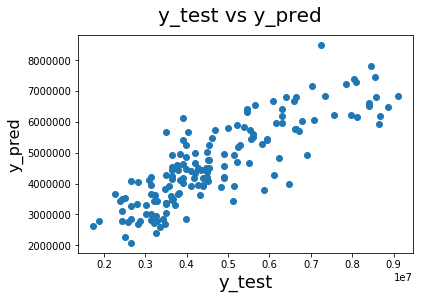

In [30]:
plot.scatter(y_test,y_predict)
plot.suptitle('y_test vs y_pred', fontsize=20) 
plot.xlabel('y_test', fontsize=18) 
plot.ylabel('y_pred', fontsize=16)

In [31]:
y_test.head()

34     8120000
372    3640000
120    5950000
204    4900000
497    2660000
Name: price, dtype: int64

In [ ]:
#import statsmodels.api as sms
#model_1 = sms.OLS(y_train, x_train).fit()
#model_1.summary()

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test,y_predict)

0.7016427226152397

In [34]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1,0
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,0,1
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,0,0
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,0,0
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,0,0


In [ ]:
#new_input = pd.DataFrame
#new_input = [[3850,3,1,2,1,0,0,0,0,0,0,0,1]]#6000	4	2	4	1	0	0	0	1	1	0	0	0

In [ ]:
#from sklearn.linear_model import LinearRegression
#regression = LinearRegression()
#regression.fit(x_train,y_train)

In [ ]:
#y_predict = regression.predict(new_input)

In [ ]:
#y_predict

In [35]:
new_data = pd.DataFrame
area = int(input("Enter the Area in sqft:  "))
bedrooms = int(input("Enter the number of bedrooms   "))
bathrooms = int(input("Enter the number of bathrooms   "))
stories = int(input("Enter the number of storage room   "))
mainroad = int(input("Enter for main road if Yes:1,NO:0  "))
guestroom = int(input("Enter for guestroom if Yes:1,NO:0   "))
basement = int(input("Enter for basement if Yes:1,NO:0   "))
hotwaterheating = int(input("Enter for hotwaterheating if Yes:1,NO:0   "))
airconditioning = int(input("Enter for airconditioning if Yes:1,NO:0   "))
parking = int(input("Enter the number of parking    "))
prefarea = int(input("Enter for prep area if Yes:1,NO:0   "))
a= input("Enter the semi-furnished: 1 or unfurnished : 2 or furnished : 3  ")
if a == 1:
    b=1
    c=0
   # furnishing_status = 1,0
elif a == 2:
    b=0
    c=1
    #furnishing_status = 0,1
else:
    b=0
    c=0
    #furnishing_status = 0,0
    

    
    
#furnishing_status = int(input("Enter the semi-furnished: 1,0 or unfurnished : 0,1 or furnished : 0,0  "))

new_data = [[area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,b,c]]

Enter the Area in sqft:  995
Enter the number of bedrooms   2
Enter the number of bathrooms   4
Enter the number of storage room   0
Enter for main road if Yes:1,NO:0  0
Enter for guestroom if Yes:1,NO:0   0
Enter for basement if Yes:1,NO:0   1
Enter for hotwaterheating if Yes:1,NO:0   1
Enter for airconditioning if Yes:1,NO:0   1
Enter the number of parking    2
Enter for prep area if Yes:1,NO:0   1
Enter the semi-furnished: 1 or unfurnished : 2 or furnished : 3  3


In [36]:

new_data

[[995, 2, 4, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0]]

In [37]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [38]:
y_predict = regression.predict(new_data)

In [39]:
y_predict

array([6636825.67321381])